In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [146]:
adv_df=pd.read_csv('Advertising.csv',)
adv_df.head()


,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [147]:
adv_df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [148]:
#first column is of no use so will drop it
df=adv_df.iloc[:,1:]
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


we can see sales column contains continuous data we can conclude this is "Regression problem".

In [149]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [150]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [151]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


from above info are getting min max, 25% ,50%,75% mean , std info of each feature.

#### Checking null values

In [152]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

We can see there is no null value present in dataset.

### EDA

In [153]:
sns.set_style('darkgrid')
plt.rcParams['figure.figsize']=(18,8)
plt.rcParams['figure.facecolor']='FFFFCB'


Text(0.5, 1.0, 'TV vs Sales')

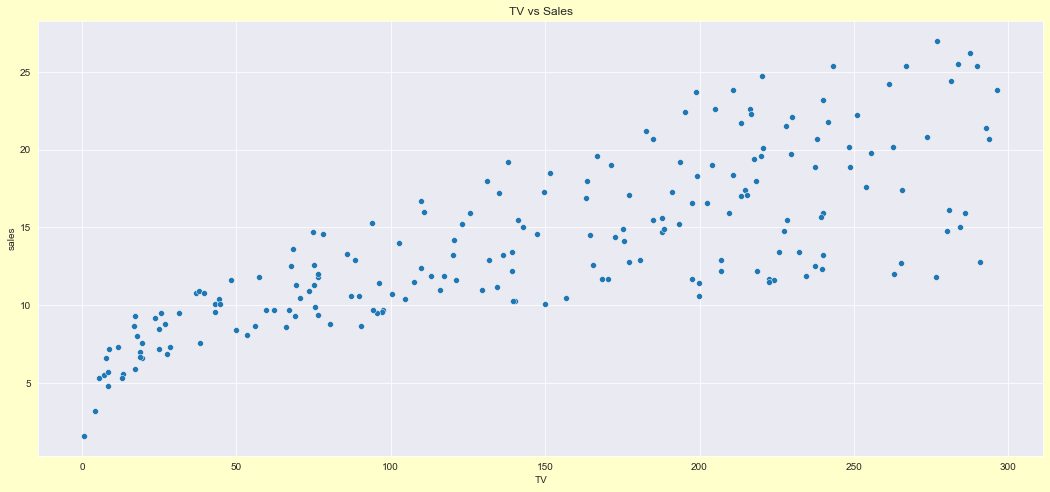

In [154]:
# TV vs Sales
sns.scatterplot(x='TV' ,y='sales' ,data=df)
plt.title('TV vs Sales')

There is +ve correlation between Tv and Sales

Text(0.5, 1.0, 'Radio vs Sales')

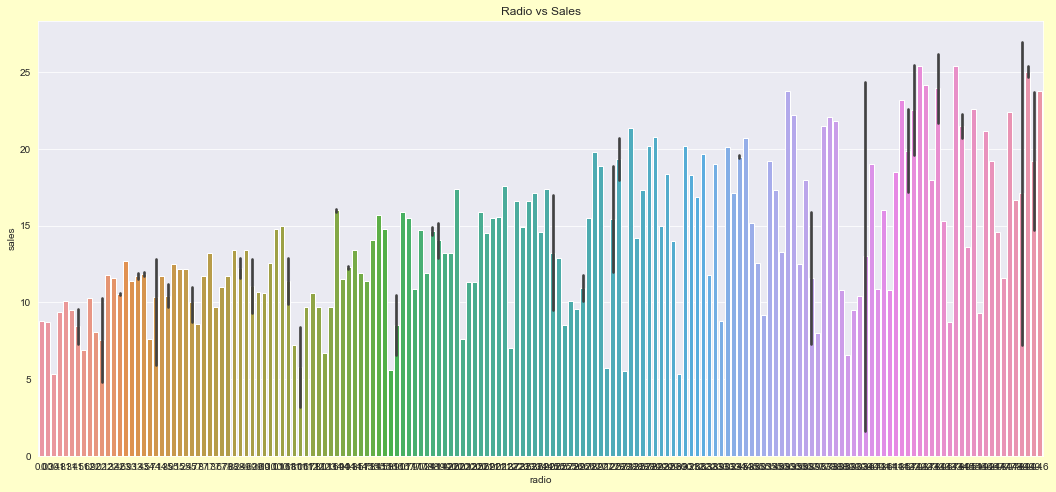

In [155]:
# radio vs Sales
sns.barplot(x='radio' ,y='sales' ,data=df)
plt.title('Radio vs Sales')

There is +ve correlation between Tv and Sales

Text(0.5, 1.0, 'newspaper vs Sales')

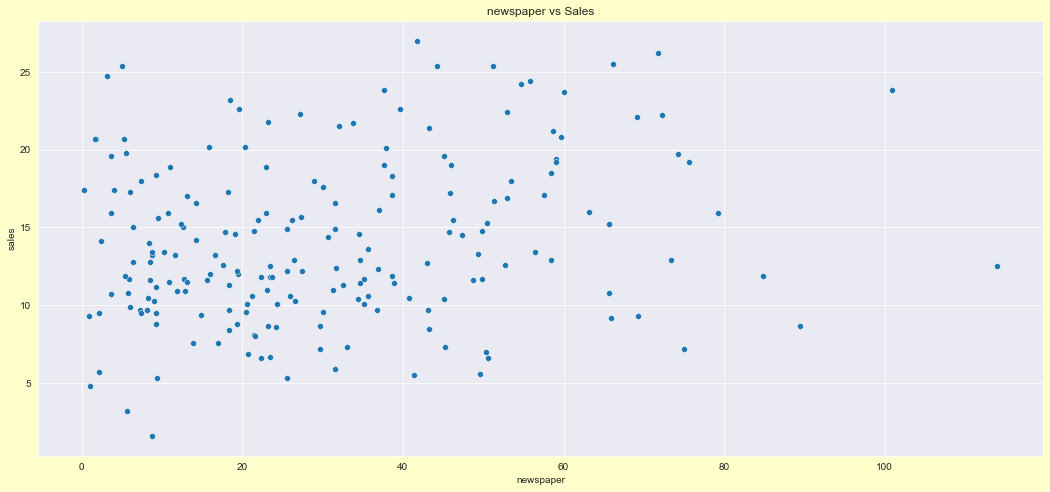

In [156]:

# newspaper vs Sales
sns.scatterplot(x='newspaper' ,y='sales' ,data=df)
plt.title('newspaper vs Sales')

around 70% sale is between range 5-50.

<AxesSubplot:>

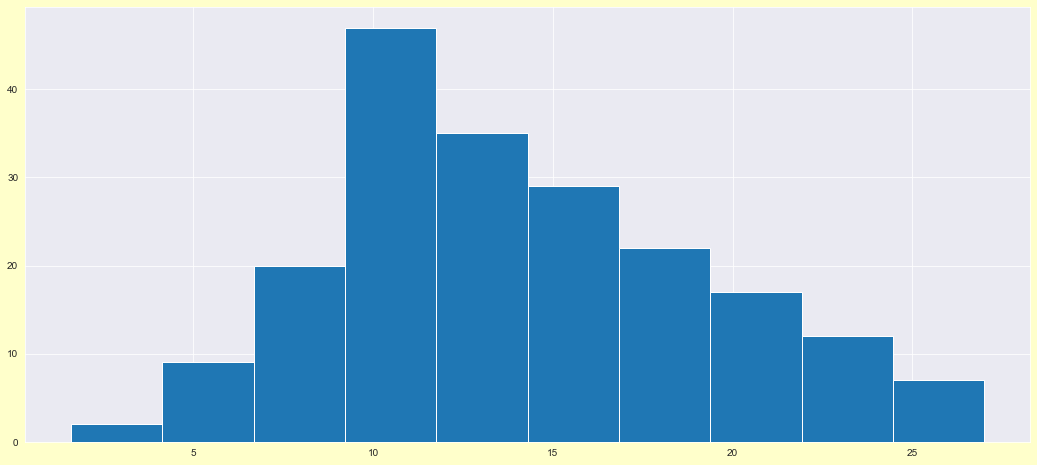

In [157]:
df['sales'].hist()

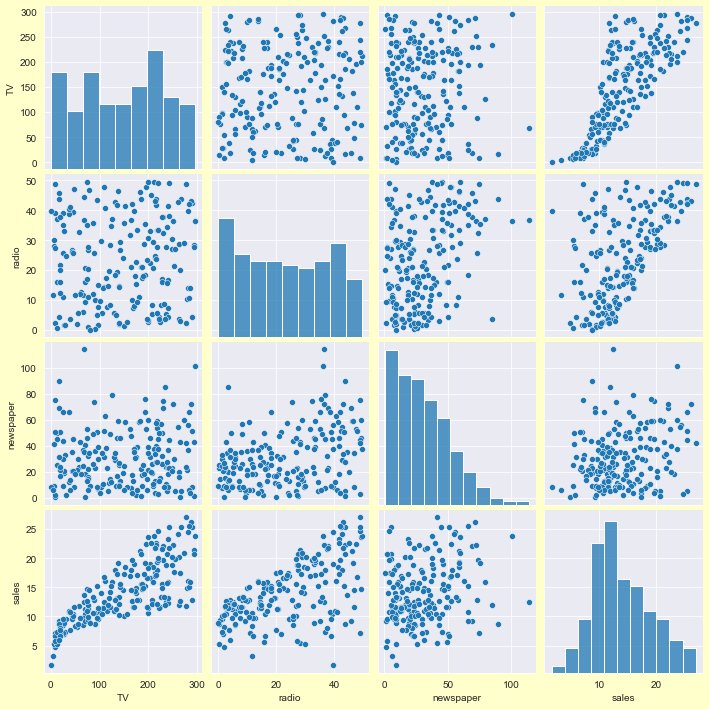

In [158]:
sns.pairplot(df)

#### Finding Correlation

In [159]:
#correlation matrix
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

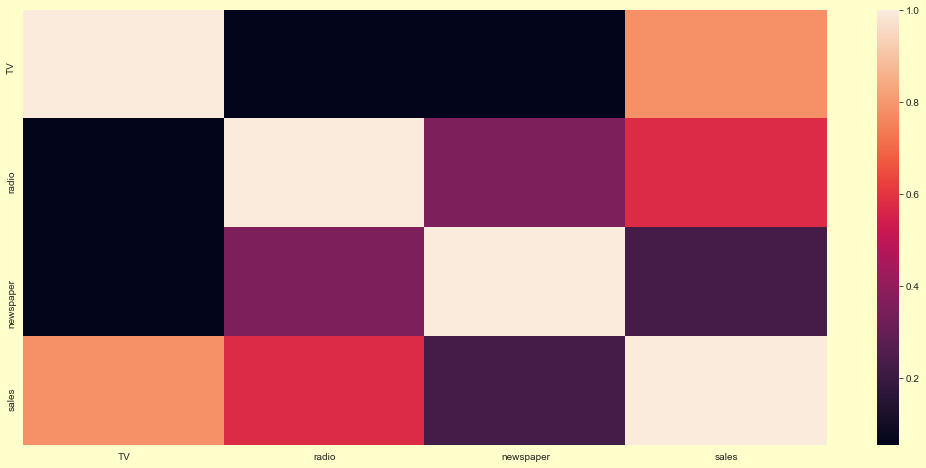

In [160]:
sns.heatmap(df.corr())

All features are positively correlated with each other

In [161]:
#findingout correlation between independent features and dependent features
df.corr()['sales'].sort_values(ascending=False)

sales        1.000000
TV           0.782224
radio        0.576223
newspaper    0.228299
Name: sales, dtype: float64

Text(0.5, 1.0, 'Correlation with target')

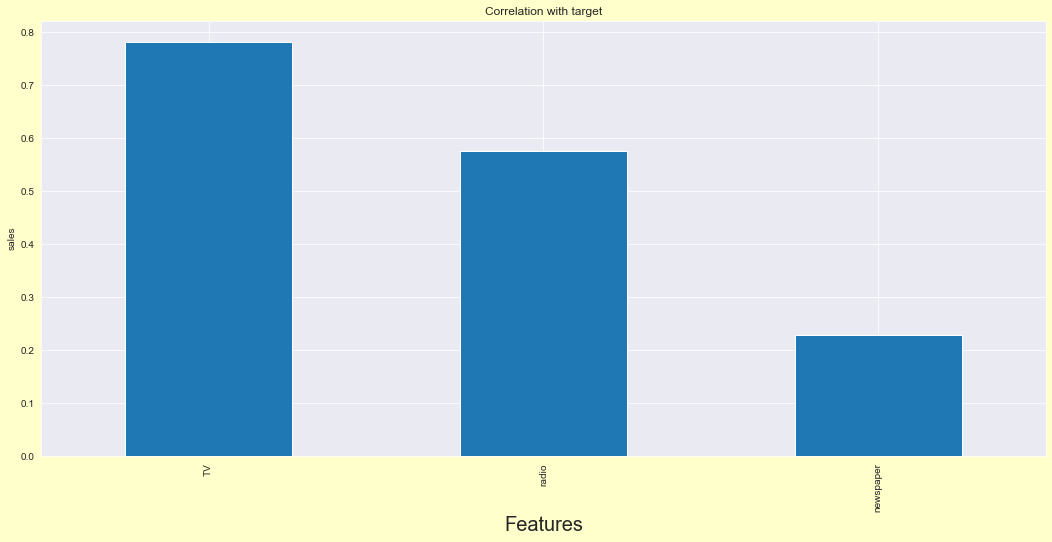

In [162]:
#Correlation with target
df.corr()['sales'].sort_values(ascending=False).drop(['sales']).plot(kind='bar')
plt.xlabel('Features',fontsize=20)
plt.ylabel('sales')
plt.title('Correlation with target')

#### Checking Data Skewness

In [163]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

After considering accepltable range +/-0.5 there is skewness present in newspaper

#### Remove Skewness by Power Transform method

In [164]:
from sklearn.preprocessing import power_transform
df_skew=df.drop('sales' , axis=1)
df_new= power_transform( df_skew , method='yeo-johnson')
cols=(['TV', 'radio', 'newspaper'])
df_new=pd.DataFrame(df_new , columns=cols)

#check the skewness in df
df_new.skew()

TV          -0.315199
radio       -0.242968
newspaper   -0.077942
dtype: float64

we can see skewness is in acceptable range

In [165]:
'TV', 'radio', 'newspaper', 'sales'

('TV', 'radio', 'newspaper', 'sales')

#### Checking for Outliers

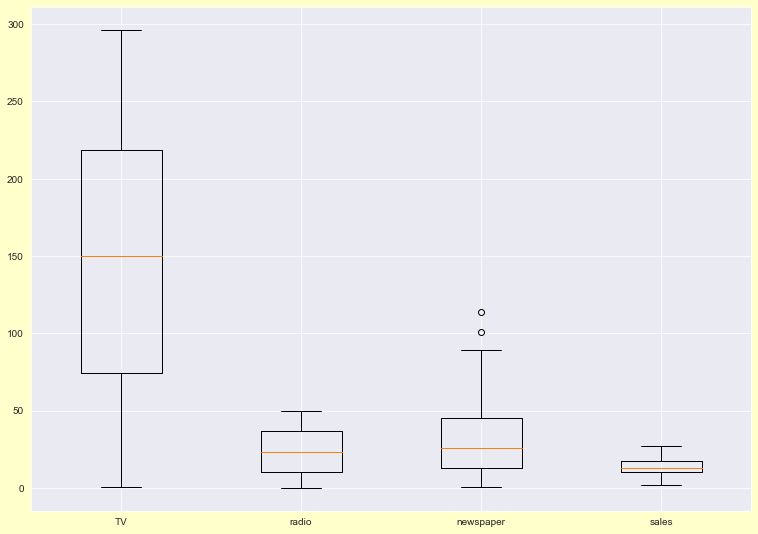

In [166]:
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(df ,data=df,labels=df.columns)
 
# show plot
plt.show()

we can see 2 outliers are present in newspaper but they are also quite closer to upper whiskers level so will not romove them.

#### will be splitting data for training purpose

In [167]:
# Independent features
x= df.drop('sales' , axis=1)
x.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [168]:
# target data
y=df['sales']
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

## Linear regression problem

In [169]:
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [170]:
lr = LinearRegression()

#### finding best value of Random State

In [171]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i ,test_size=0.2 )
    lr.fit(x_train,y_train)
    pred_train= lr.predict(x_train)
    pred_test= lr.predict(x_test)
    training_accuracy = r2_score(y_train ,pred_train )
    testing_accuracy = r2_score(y_test ,pred_test )
   
    print(f"At Random State {i}, the training accuracy is :",round(training_accuracy ,2))
    print(f"At Random State {i}, the testing accuracy is :",round(testing_accuracy ,2),'\n\n')
    diff=training_accuracy-testing_accuracy
    

At Random State 0, the training accuracy is : 0.91
At Random State 0, the testing accuracy is : 0.86 


At Random State 1, the training accuracy is : 0.9
At Random State 1, the testing accuracy is : 0.89 


At Random State 2, the training accuracy is : 0.92
At Random State 2, the testing accuracy is : 0.76 


At Random State 3, the training accuracy is : 0.89
At Random State 3, the testing accuracy is : 0.91 


At Random State 4, the training accuracy is : 0.89
At Random State 4, the testing accuracy is : 0.91 


At Random State 5, the training accuracy is : 0.9
At Random State 5, the testing accuracy is : 0.9 


At Random State 6, the training accuracy is : 0.89
At Random State 6, the testing accuracy is : 0.92 


At Random State 7, the training accuracy is : 0.89
At Random State 7, the testing accuracy is : 0.91 


At Random State 8, the training accuracy is : 0.91
At Random State 8, the testing accuracy is : 0.85 


At Random State 9, the training accuracy is : 0.89
At Random State 

At random state  5 and 24 we can see training and testing accuracy is almost same . so will choose Random_state=24

In [172]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=24 ,test_size=0.2 )
lr.fit(x_train,y_train)

LinearRegression()

In [173]:
print('R2 score for linear regression is :',round(r2_score(y_test,pred_test),3))

R2 score for linear regression is : -1.285


In [174]:
#Displaying prediction result on test data
prediction=pd.DataFrame()
prediction['y_test']=y_test
prediction['pred_test']=pred_test
prediction.head()

,y_test,pred_test
197,12.8,13.954466
109,19.8,6.560968
101,23.8,8.377303
125,10.6,8.969426
48,14.8,6.815364


### Cross Validation of model

In [175]:
from sklearn.model_selection import cross_val_score

In [176]:
training_accuracy = r2_score(y_train ,pred_train )
testing_accuracy = r2_score(y_test ,pred_test )

for j in range(2,12):
    reg_cvScore = cross_val_score(lr,x,y,cv=j)
    reg_cvScore_mean = reg_cvScore.mean()
    print(f" At cross fold {j} CV Score is {round(reg_cvScore_mean,3)} and Training Accuracy is:{round(training_accuracy,3)} and Testing Accuracy is:{round(testing_accuracy,3)}\n")

 At cross fold 2 CV Score is 0.891 and Training Accuracy is:-1.103 and Testing Accuracy is:-1.285

 At cross fold 3 CV Score is 0.892 and Training Accuracy is:-1.103 and Testing Accuracy is:-1.285

 At cross fold 4 CV Score is 0.89 and Training Accuracy is:-1.103 and Testing Accuracy is:-1.285

 At cross fold 5 CV Score is 0.887 and Training Accuracy is:-1.103 and Testing Accuracy is:-1.285

 At cross fold 6 CV Score is 0.89 and Training Accuracy is:-1.103 and Testing Accuracy is:-1.285

 At cross fold 7 CV Score is 0.886 and Training Accuracy is:-1.103 and Testing Accuracy is:-1.285

 At cross fold 8 CV Score is 0.883 and Training Accuracy is:-1.103 and Testing Accuracy is:-1.285

 At cross fold 9 CV Score is 0.882 and Training Accuracy is:-1.103 and Testing Accuracy is:-1.285

 At cross fold 10 CV Score is 0.885 and Training Accuracy is:-1.103 and Testing Accuracy is:-1.285

 At cross fold 11 CV Score is 0.877 and Training Accuracy is:-1.103 and Testing Accuracy is:-1.285



As we can see we are getting almost same result for all CV values will take CV=6

In [185]:
Model_score= Model_score.append({'Model_Name':'Linear Regression','Training_Accuracy':-1.103,'Testing_Accuracy':-1.285,'CV_Score':0.89 },ignore_index=True)    

Text(0.5, 1.0, 'Linear Regression line')

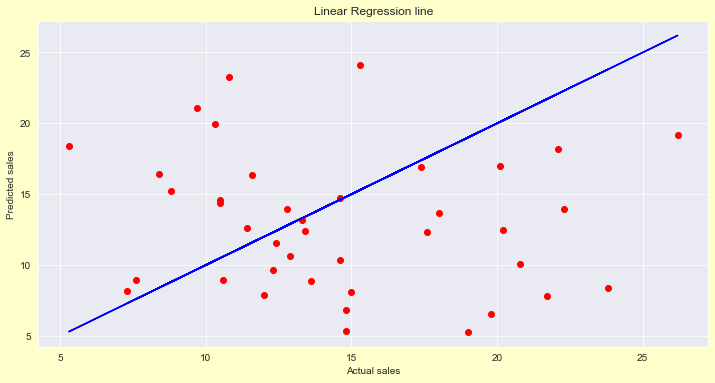

In [177]:
## Drawing Best fit line
plt.figure(figsize=(12,6))
plt.scatter(x=y_test ,y= pred_test ,color='r')
plt.plot(y_test ,y_test ,color='b')
plt.xlabel('Actual sales')
plt.ylabel('Predicted sales')
plt.title('Linear Regression line')

### Regularization

In [178]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso ,Ridge

In [179]:
#print(model_name)
Model_score=pd.DataFrame(columns=['Model_Name','Training_Accuracy','Testing_Accuracy','CV_Score'])

model=Lasso()
model.fit(x_train,y_train)
pred_train= model.predict(x_train)
pred_test= model.predict(x_test)
training_accuracy = r2_score(y_train ,pred_train )
testing_accuracy = r2_score(y_test ,pred_test )
cv_score = 0
print(training_accuracy)
print(testing_accuracy)


0.8942946867352511
0.9056381132644026


In [180]:
from sklearn.model_selection import cross_val_score

for j in range(2,15):
    ls_cvScore=cross_val_score(model,x,y,cv=j)
    ls_cvScore_mean = ls_cvScore.mean()
    print(round(ls_cvScore_mean,3))
    if(cv_score < round(ls_cvScore_mean,3)):
        cv_score=round(ls_cvScore_mean,3)

Model_score= Model_score.append({'Model_Name':'Lasso','Training_Accuracy':round(training_accuracy,3),'Testing_Accuracy':round(testing_accuracy,3),'CV_Score':cv_score},ignore_index=True)    
Model_score


0.892
0.892
0.891
0.888
0.891
0.887
0.883
0.883
0.886
0.878
0.886
0.885
0.876


,Model_Name,Training_Accuracy,Testing_Accuracy,CV_Score
0,Lasso,0.894,0.906,0.892


In [181]:
rdg=Ridge()
rdg.fit(x_train,y_train)
pred_train= rdg.predict(x_train)
pred_test= rdg.predict(x_test)
training_accuracy = r2_score(y_train ,pred_train )
testing_accuracy = r2_score(y_test ,pred_test )
cv_score = 0
print(training_accuracy)
print(testing_accuracy)


0.894652986237678
0.9043166969305148


In [183]:
from sklearn.model_selection import cross_val_score
for j in range(2,15):
    rdg_cvScore = cross_val_score(rdg ,x,y,cv=j)
    rdg_cvScore_mean = rdg_cvScore.mean()
    
    print(round(rdg_cvScore_mean,3))
    
    if(cv_score < round(rdg_cvScore_mean,3)):
        cv_score=round(rdg_cvScore_mean,3)

Model_score= Model_score.append({'Model_Name':'Ridge','Training_Accuracy':round(training_accuracy,3),'Testing_Accuracy':round(testing_accuracy,3),'CV_Score':cv_score},ignore_index=True)    
Model_score


0.891
0.892
0.89
0.887
0.89
0.886
0.883
0.882
0.885
0.877
0.885
0.885
0.874


,Model_Name,Training_Accuracy,Testing_Accuracy,CV_Score
0,Lasso,0.894,0.906,0.892
1,Ridge,0.895,0.904,0.892


In [186]:
Model_score

,Model_Name,Training_Accuracy,Testing_Accuracy,CV_Score
0,Lasso,0.894,0.906,0.892
1,Ridge,0.895,0.904,0.892
2,Linear Regression,-1.103,-1.285,0.890


### XGBoost model

In [191]:
!pip install xgboost

  Using cached xgboost-1.5.2-py3-none-win_amd64.whl (106.6 MB)


In [193]:
import xgboost
from xgboost import XGBRegressor


In [207]:
xgbr= XGBRegressor()
print(xgbr)

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None)


In [197]:
xgbr.fit(x_train,y_train)
pred_train=xgbr.predict(x_train)
pred_test =xgbr.predict(x_test)
training_accuracy = r2_score(y_train,pred_train)
testing_accuracy =r2_score(y_test,pred_test)
cv_score = 0
print(round(training_accuracy,3))
print(round(testing_accuracy,3))



1.0
0.979


In [215]:
for j in range(2,12):
    xgbr_cvScore = cross_val_score(xgbr ,x,y,cv=j)
    xgbr_cvScore_mean = xgbr_cvScore.mean()
    
    if (cv_score < xgbr_cvScore_mean):
        cv_score = xgbr_cvScore_mean
        
print("CV score is :",round(cv_score,3))


CV score is : 0.975


In [205]:
Model_score= Model_score.append({'Model_Name':'XGboost','Training_Accuracy':round(training_accuracy,3),'Testing_Accuracy':round(testing_accuracy,3),'CV_Score':cv_score},ignore_index=True)    
Model_score

,Model_Name,Training_Accuracy,Testing_Accuracy,CV_Score
0,Lasso,0.894,0.906,0.8920
1,Ridge,0.895,0.904,0.8920
2,Linear Regression,-1.103,-1.285,0.8900
3,XGboost,1.000,0.979,0.9752


#### from the above result we can say XGBoost is performing pretty good so will select it .

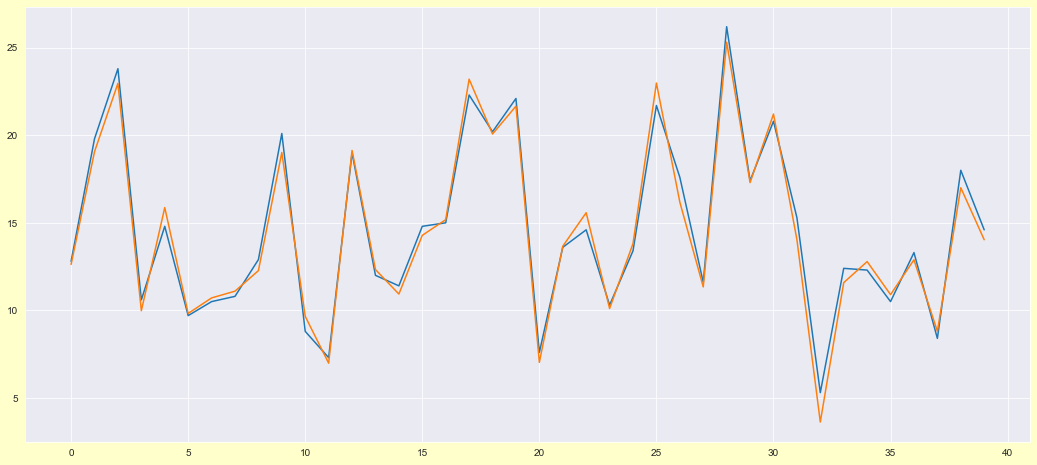

In [206]:
x_axis=range(len(y_test))
plt.plot(x_axis,y_test ,label="Actual")
plt.plot(x_axis,pred_test ,label="Predicted")

we can see Actual and Predicted results are almost same. 

#### Hyper Parameter tunning

In [209]:
from sklearn.model_selection import GridSearchCV

n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster 
    }

grid_cv= GridSearchCV(xgbr ,hyperparameter_grid ,scoring='accuracy' ,cv=12)
grid_cv.fit(x_train,y_train)
grid_cv.best_params_


{'booster': 'gbtree',
 'learning_rate': 0.05,
 'max_depth': 2,
 'min_child_weight': 1,
 'n_estimators': 100}

In [217]:
#prediction with best parameter
pred_test=grid_cv.best_estimator_.predict(x_test) 

testing_accuracy =r2_score(y_test,pred_test)
cv_score = 0

print("Testing accuracy is:",round(testing_accuracy,3))



Testing accuracy is: 0.971


In [218]:
for j in range(2,12):
    xgbr_cvScore = cross_val_score(xgbr ,x,y,cv=j)
    xgbr_cvScore_mean = xgbr_cvScore.mean()
   
    if (cv_score < xgbr_cvScore_mean):
        cv_score = xgbr_cvScore_mean
        
print("CV score is :",round(cv_score,3))

CV score is : 0.975


#### We have got Testing accuracy :0.971 and CV score : 0.975 

In [220]:
import joblib
joblib.dump(grid_cv.best_estimator_,"AdvertisingSalesChannelPrediction.pkl")

['AdvertisingSalesChannelPrediction.pkl']